# UrbanSound8K 分类

## 1 音频数据分析

In [ ]:
import time
import os
import struct
import matplotlib.pyplot as plt
import IPython.display as ipd
import pandas as pd
import numpy as np
import librosa # for sound processing.

In [138]:
import pandas as pd
dat = pd.read_csv("./UrbanSound8K/metadata/UrbanSound8K.csv")
data = pd.DataFrame(dat,columns=dat.columns,index = None)
data.head()

,slice_file_name,fsID,start,end,salience,fold,classID,label
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


### metadata 有8732条音频记录，包含文件名、所在文件夹、分类标签、分类ID

In [139]:
data.shape

(8732, 8)

### 共有10个类别的声音

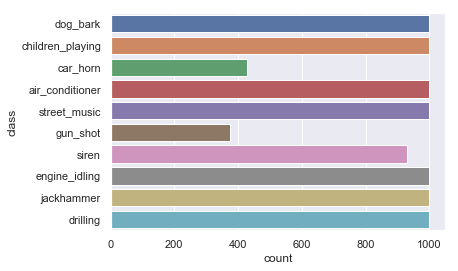

In [62]:
sns.set(style="darkgrid")
sns.countplot(y= data['class'],orient='v')
plt.show()

## 1.2 不同类别的音频

In [154]:
import matplotlib.pyplot as plt
import librosa.display
samples = data.drop_duplicates(subset = "classID",keep='first',inplace=False)

In [189]:
print(samples)

        slice_file_name    fsID      start        end  salience  fold  \
0      100032-3-0-0.wav  100032   0.000000   0.317551         1     5   
1    100263-2-0-117.wav  100263  58.500000  62.500000         1     5   
9      100648-1-0-0.wav  100648   4.823402   5.471927         2    10   
22     100852-0-0-0.wav  100852   0.000000   4.000000         1     5   
94     101848-9-0-0.wav  101848   0.000000   4.000000         1     7   
106    102305-6-0-0.wav  102305   0.000000   2.611610         1     1   
114    102853-8-0-0.wav  102853   0.000000   4.000000         2     7   
122    102857-5-0-0.wav  102857   0.000000   4.000000         1    10   
171    103074-7-0-0.wav  103074   3.341279   7.341279         1     1   
196    103199-4-0-0.wav  103199   0.000000   4.000000         1     3   

     classID             label  
0          3          dog_bark  
1          2  children_playing  
9          1          car_horn  
22         0   air_conditioner  
94         9      street_music 

## 1.2.1 波形图

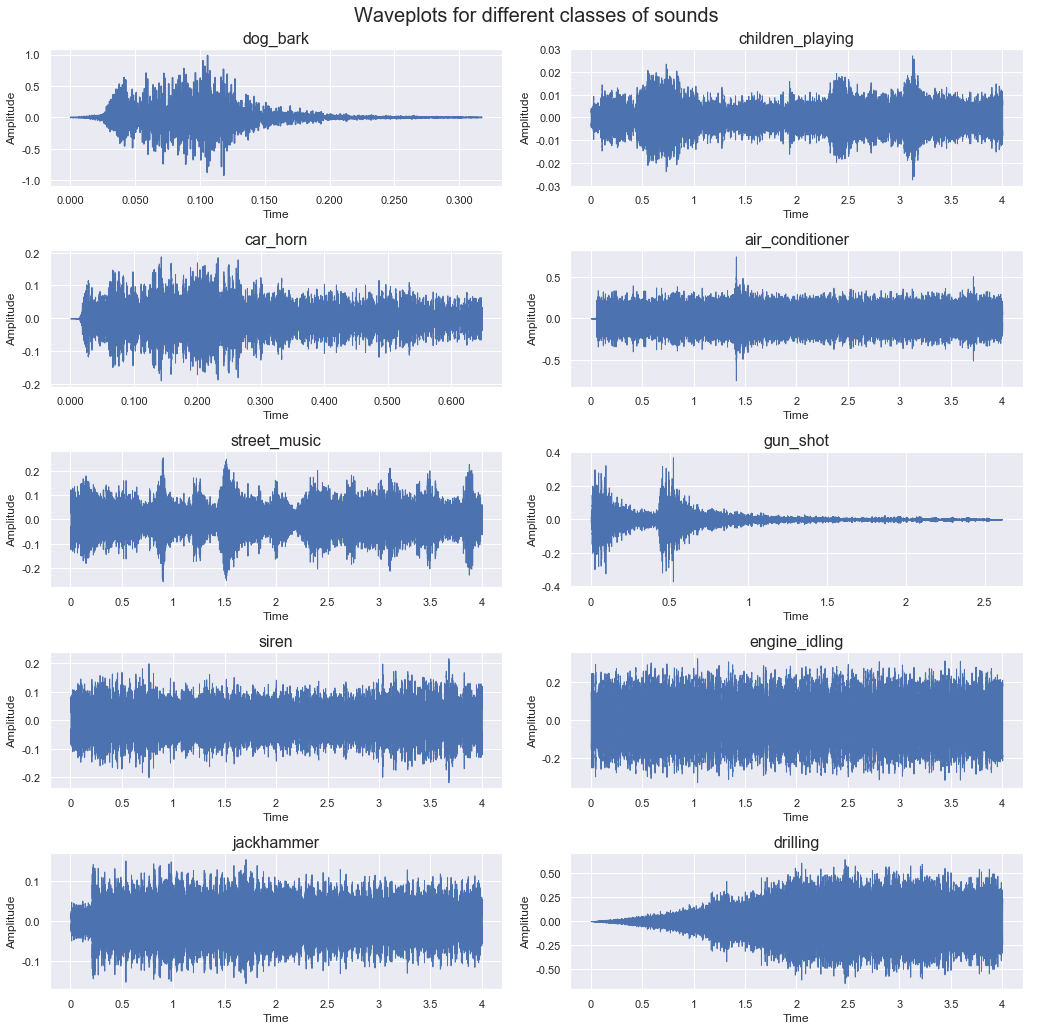

In [183]:
fig = plt.figure(figsize=(15,15))
fig.subplots_adjust(hspace = 0.5, wspace = 0.5)
plt.title('Waveplots for different classes of sounds\n',size=20)
plt.axis('off')
i = 0
for index,row in samples.iterrows():
#     print(index)
#     print(row["fold"])
    fig.add_subplot(5,2,i+1)
    i += 1
    plt.title(row["label"], size =16)
    plt.ylabel('Amplitude', size = 12)
    file_name = "./UrbanSound8K/audio/fold" + str(row["fold"]) + "/" + str(row["slice_file_name"]) # fold, "slice_file_name"
#     print(file_name)
    data,sample_rate = librosa.load(file_name)
    librosa.display.waveshow(data,sr=sample_rate)
    plt.tight_layout()

## 1.2.2 声谱图

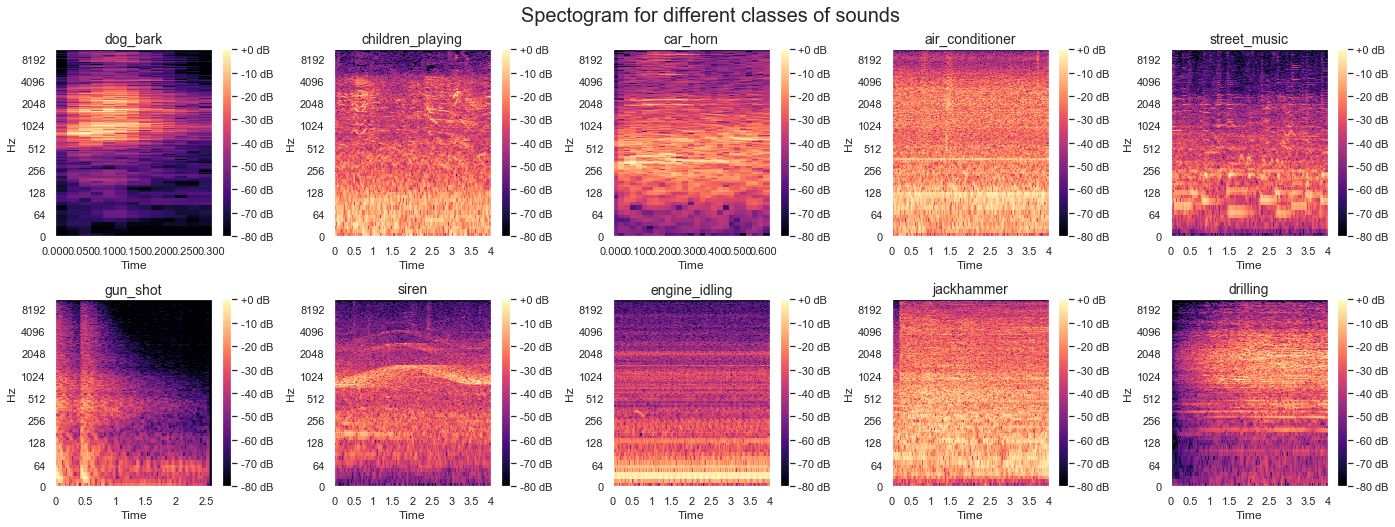

In [185]:
fig = plt.figure(figsize=(20, 8))
fig.subplots_adjust(hspace = 0.5, wspace = 0.5)
plt.title('Spectogram for Different Classes of sounds\n',size=20)
plt.axis('off')
i = 0
for index,row in samples.iterrows():
    fig.add_subplot(2,5,i+1)
    i += 1
    plt.title(row["label"], size = 15)
    file_name = "./UrbanSound8K/audio/fold" + str(row["fold"]) + "/" + str(row["slice_file_name"]) # fold, "slice_file_name"
    data,sample_rate = librosa.load(file_name)
    D = librosa.amplitude_to_db(np.abs(librosa.stft(data)), ref=np.max)
    librosa.display.specshow(D, x_axis = "time",y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.tight_layout()

## 1.2.3 MFCC特征

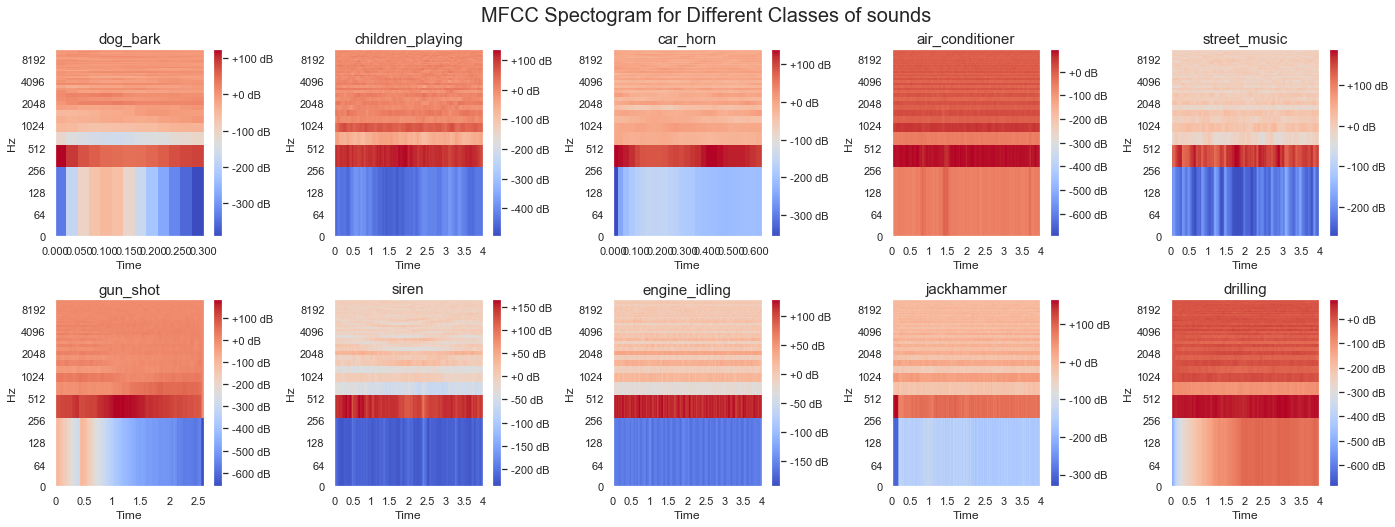

In [191]:
fig = plt.figure(figsize=(20, 8))
fig.subplots_adjust(hspace = 0.5, wspace = 0.5)
plt.title('MFCC Spectogram for Different Classes of sounds\n',size=20)
plt.axis('off')
i = 0
for index,row in samples.iterrows():
    fig.add_subplot(2,5,i+1)
    i += 1
    plt.title(row["label"], size = 15)
    file_name = "./UrbanSound8K/audio/fold" + str(row["fold"]) + "/" + str(row["slice_file_name"]) # fold, "slice_file_name"
    data,sample_rate = librosa.load(file_name,res_type='kaiser_fast')
    tmp_ = librosa.feature.mfcc(y=data, sr=sr, n_mfcc = 40)  # 特征向量维度原始为20 ，获取MFCC特征
    librosa.display.specshow(tmp_,x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.tight_layout()

## 2 音频特征提取

### 共有8732个音频数据，每个音频，获取其特征和分类标签（ID）

In [70]:
import numpy as np
features = np.zeros(shape = (data.shape[0], 2), dtype = object)
features.shape

(8732, 2)

In [5]:
data['slice_file_name']

0         100032-3-0-0.wav
1       100263-2-0-117.wav
2       100263-2-0-121.wav
3       100263-2-0-126.wav
4       100263-2-0-137.wav
               ...        
8727       99812-1-2-0.wav
8728       99812-1-3-0.wav
8729       99812-1-4-0.wav
8730       99812-1-5-0.wav
8731       99812-1-6-0.wav
Name: slice_file_name, Length: 8732, dtype: object

In [6]:
data.slice_file_name[0]

'100032-3-0-0.wav'

## 2.1 逐条读取音频数据，并获取MFCC特征，设定向量维度为40
## 特征 + 标签ID，存入特征集 

In [10]:

from tqdm import tqdm
dat = pd.read_csv("./UrbanSound8K/metadata/UrbanSound8K.csv")
data = pd.DataFrame(dat,columns=dat.columns,index = None)
audio_path = "./UrbanSound8K/audio/fold"
for i in tqdm(range(data.shape[0])):
    file_name = data.slice_file_name[i]  # 音频文件名
    fold_id = data.fold[i] # 音频分类Label ID
    path_name = audio_path + str(fold_id) + "/" + file_name # 音频完整地址
    try:
        x, sr = librosa.load(path_name, res_type = "kaiser_fast")  # librosa 读取音频
        tmp_ = librosa.feature.mfcc(y=x, sr=sr, n_mfcc = 40)  # 特征向量维度原始为20 ，获取MFCC特征
        tmpf = np.mean(tmp_.T, axis=0) # 向量化
        class_label = data.classID[i]  # 获取标签
    except:
        print("Error encountered while parsing: ", path_name)
        tmpf = None
        class_label = None
    features[i, 0], features[i, 1] = tmpf, class_label  # 加入特征集

 41%|████      | 3554/8732 [04:25<06:13, 13.88it/s]D:\Anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1323
  return f(*args, **kwargs)
 95%|█████████▌| 8325/8732 [10:43<00:21, 19.29it/s]D:\Anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1103
  return f(*args, **kwargs)
D:\Anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1523
  return f(*args, **kwargs)
100%|██████████| 8732/8732 [11:15<00:00, 12.94it/s]


## 2.2 逐条读取音频数据，并获取Mel特征，设定向量维度为40

In [258]:
import numpy as np
dat = pd.read_csv("./UrbanSound8K/metadata/UrbanSound8K.csv")
data = pd.DataFrame(dat,columns=dat.columns,index = None)
features2 = np.zeros(shape = (data.shape[0], 2), dtype = object)
features2.shape
from tqdm import tqdm
audio_path = "./UrbanSound8K/audio/fold"
for i in tqdm(range(data.shape[0])):
    file_name = data.slice_file_name[i]  # 音频文件名
    fold_id = data.fold[i] # 音频分类Label ID
    path_name = audio_path + str(fold_id) + "/" + file_name # 音频完整地址
    try:
        x, sr = librosa.load(path_name, res_type = "kaiser_fast")  # librosa 读取音频
        tmp_ = librosa.feature.melspectrogram(y=x, sr=sr)  # 获取Mel特征
        tmpf = np.mean(tmp_.T, axis=0) # 向量化
        class_label = data.classID[i]  # 获取标签
    except:
        print("Error encountered while parsing: ", path_name)
        tmpf = None
        class_label = None
    features2[i, 0], features[i, 1] = tmpf, class_label  # 加入特征集


100%|██████████| 8732/8732 [11:20<00:00, 12.82it/s]


## 2.2 将特征集保存

In [11]:
np.save("mfcc_features.npy",features,allow_pickle=True)   # 保存特征

In [259]:
np.save("mel_features.npy",features2,allow_pickle=True)   # 保存特征

## 2.3 加载特征集，查看特征维度

In [279]:
data1 = pd.DataFrame(np.load("mfcc_features.npy",allow_pickle= True))
data1.columns = ['feature', 'label']
print(data1.feature[0].shape)
data1.head()


(40,)


,feature,label
0,"[-218.18938, 71.38549, -131.49442, -52.25892, ...",3
1,"[-425.05234, 110.67095, -54.192833, 62.045406,...",2
2,"[-459.82623, 122.82864, -47.908062, 53.302677,...",2
3,"[-414.82184, 102.94826, -36.656853, 54.170742,...",2
4,"[-447.60776, 115.08627, -53.74607, 61.55309, 1...",2


## 3 数据集

### 训练分类器和模型，需要构造输入的数据和标签，包括训练集和测试集

## 3.1 读取特征和标签

In [280]:
from sklearn.preprocessing import LabelEncoder
X = np.array(data1.feature.tolist()) # 特征
y = np.array(data1.label.tolist()) # 标签
lb = LabelEncoder()  # 标签处理
print(X.shape)
print(y)

(8732, 40)
[3 2 2 ... 1 1 1]


## 3.2 划分训练集、测试集

In [282]:
from sklearn.model_selection import train_test_split
# X, val_x, y, val_y = train_test_split(X,y)
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.25 , random_state = 1) # test_size = 0.25 , random_state = 1
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)  # 训练集：测试集 = 3：1

(6549, 40) (2183, 40) (6549,) (2183,)


## 3.3 保留一维的标签，SVM对应使用一维标签

In [283]:
y_train_1 , y_test_1 = y_train, y_test  # 一维标签

In [284]:
print(y_train_1.shape, y_test_1.shape)

(6549,) (2183,)


## 3.4 将一维标签转换为二维矩阵

In [285]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(lb.fit_transform(y_train))  # 训练集标签
y_test = to_categorical(lb.fit_transform(y_test))  # 验证集标签
print(y_train.shape, y_test.shape)

(6549, 10) (2183, 10)


In [286]:
print(y_train.shape, y_test.shape)
print(x_train.shape, x_test.shape)

(6549, 10) (2183, 10)
(6549, 40) (2183, 40)


## 4 SVM分类

## 4.1 测试较佳参数组合

In [224]:
# 网格搜索 获取最佳的参数组合 search the hyperparameter space to find the best model 
tuned_parameters = [{'kernel': ['rbf'], 
                     'gamma': [1e-3, 1e-4, 1e-5],
                     'C': [1, 10 ,20,30,40,50]}]
#                    , {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]
searchpara = GridSearchCV(svm.SVC(), tuned_parameters)
searchpara.fit(x_train, y_train_1)
searchpara.best_params_

{'C': 40, 'gamma': 0.0001, 'kernel': 'rbf'}

## 4.2 定义分类器，训练模型并测试

In [225]:
# 使用上述得到的参数组合，构建分类器 construct the model by the best hyperparameters found above 
SVM = svm.SVC(C=40.0, gamma=0.0001)

# 训练SVM模型 train the model 使用一维的标签
SVM.fit(x_train,y_train_1)

# 测试
y_pred = SVM.predict(x_test)

## 4.3 定义结果函数，输出测试结果

In [261]:
import sklearn.metrics as sm 
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    输出测试分类的报告，并可视化报告
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix 输出分类报告
    bg = sm.classification_report(y_true, y_pred) 
    print("分类结果", bg, sep='\n') 
    cm = confusion_matrix(y_true, y_pred)
    
    fig, ax = plt.subplots(figsize = (8,8))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)

    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    plt.show()  # 将结果可视化输出
    return ax


## 4.4 输出测试的分类结果

分类结果
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       238
           1       0.95      0.83      0.89       119
           2       0.86      0.88      0.87       264
           3       0.86      0.83      0.84       247
           4       0.92      0.93      0.93       238
           5       0.96      0.97      0.97       257
           6       0.82      0.82      0.82        91
           7       0.93      0.96      0.95       249
           8       0.95      0.96      0.95       246
           9       0.86      0.86      0.86       234

    accuracy                           0.91      2183
   macro avg       0.90      0.90      0.90      2183
weighted avg       0.91      0.91      0.91      2183



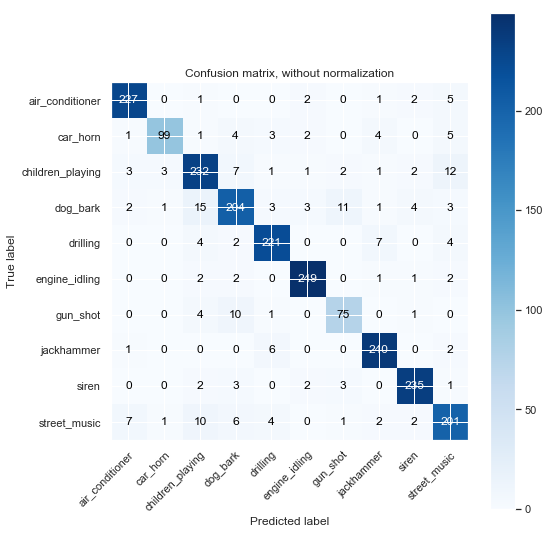

In [262]:
class_names = dat.groupby(['label', 'classID'], as_index = False).sum()['label']  # 标签集合
plot_confusion_matrix(y_test_1, y_pred, classes=class_names, cmap=plt.cm.Blues)

## 5 神经网络模型

## 5.1 定义模型搭建，输入要与特征维度一致，输出预测要与标签种类数一致

In [287]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Convolution2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from sklearn import metrics 
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from tensorflow.keras.callbacks import LearningRateScheduler

num_labels = len(class_names)  # 标签种类数

def build_model(model):
    # build model
    # for net in range(nets):
    model = Sequential()

    model.add(Dense(512, input_shape=(40,)))  # 输入层
    model.add(Activation('relu'))
    model.add(Dropout(0.45))

    model.add(Dense(256))  # 中间层
    model.add(Activation('relu'))
    model.add(Dropout(0.45))


    model.add(Dense(num_labels))  # 预测层 归一化
    model.add(Activation('softmax'))

    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='RMSprop')
    
    return model
    
def acc(y_test, prediction):  # 定义输出结果的函数
    plot_confusion_matrix(y_test, prediction, classes=class_names, cmap=plt.cm.Blues)
    

In [288]:
print(len(class_names))  

10


## 5.2 构建模型

In [302]:
nets = 5
model = [0] * nets
for net in range(nets):
    model[net] = build_model(model[net])
model[-1].summary()


Model: "sequential_45"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_135 (Dense)            (None, 512)               20992     
_________________________________________________________________
activation_135 (Activation)  (None, 512)               0         
_________________________________________________________________
dropout_90 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_136 (Dense)            (None, 256)               131328    
_________________________________________________________________
activation_136 (Activation)  (None, 256)               0         
_________________________________________________________________
dropout_91 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_137 (Dense)            (None, 10)              

## 5.3 确认数据集，标签为二维矩阵

In [291]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(lb.fit_transform(y_train_1))  # 训练集标签
y_test = to_categorical(lb.fit_transform(y_test_1))  # 验证集标签
print(y_train.shape, y_test.shape) # 这里要确保标签数据格式为矩阵 

(6549, 10) (2183, 10)


## 5.4 多组模型训练，组合epochs 和 batch_size

In [303]:
from tqdm import tqdm
# TRAIN NETWORKS 训练模型 
history = [0] * nets
epochs_s = [200,200, 250,250, 275]
batch_s = [256, 128, 256, 128, 256]

for j in tqdm(range(nets)):
    x_tr, x_te, y_tr, y_te = x_train, x_test, y_train, y_test
    history[j] = model[j].fit(x_tr, y_tr, batch_size=batch_s[j], epochs = epochs_s[j], validation_data = (x_te,y_te), verbose=0)
    print("CNN {0:d}: Epochs={1:d}, Batch_size={2:d}, Train accuracy={3:.5f}, Validation accuracy={4:.5f}".format(j+1,epochs_s[j],batch_s[j],max(history[j].history['accuracy']),max(history[j].history['val_accuracy'])))


 20%|██        | 1/5 [00:41<02:46, 41.69s/it]

CNN 1: Epochs=200, Batch_size=256, Train accuracy=0.94045, Validation accuracy=0.93541


 40%|████      | 2/5 [01:28<02:14, 44.70s/it]

CNN 2: Epochs=200, Batch_size=128, Train accuracy=0.92426, Validation accuracy=0.92900


 60%|██████    | 3/5 [02:14<01:30, 45.37s/it]

CNN 3: Epochs=250, Batch_size=256, Train accuracy=0.95007, Validation accuracy=0.93907


 80%|████████  | 4/5 [03:22<00:54, 54.30s/it]

CNN 4: Epochs=250, Batch_size=128, Train accuracy=0.92808, Validation accuracy=0.93358


100%|██████████| 5/5 [04:10<00:00, 50.16s/it]

CNN 5: Epochs=275, Batch_size=256, Train accuracy=0.95083, Validation accuracy=0.94228


In [265]:
print(history[4].history)

{'loss': [9.78250843161826, 2.4385539232674294, 2.193696652610605, 2.0737428451097726, 1.9627236882354089, 1.8573922417076112, 1.7974191857651183, 1.699694482620153, 1.5813680542281683, 1.5246960859587035, 1.451020087863056, 1.384974921217473, 1.2925575112437342, 1.2369082468414074, 1.180565800843739, 1.1471934391717216, 1.0853624923445102, 1.062650758795273, 1.0108878316451875, 0.9752315171785365, 0.9368821143703545, 0.9141951597798124, 0.8800265797587238, 0.865909629931867, 0.8147102846755637, 0.7948204474715644, 0.7599988084819448, 0.7577575777191882, 0.7192284942474196, 0.7070032090954351, 0.692612394938525, 0.657958463105123, 0.6528410878704238, 0.6484662686928409, 0.6195701328574801, 0.6127349137167728, 0.5911044318050915, 0.5746611241830871, 0.5651400893548915, 0.5633354064507746, 0.5437517660886282, 0.531144663420756, 0.5227307686097277, 0.5203041723437447, 0.499454198374714, 0.5180309524307143, 0.47477201634389715, 0.4649872659936099, 0.47094131696040364, 0.45304917540599743, 

## 5.5 可视化模型训练结果

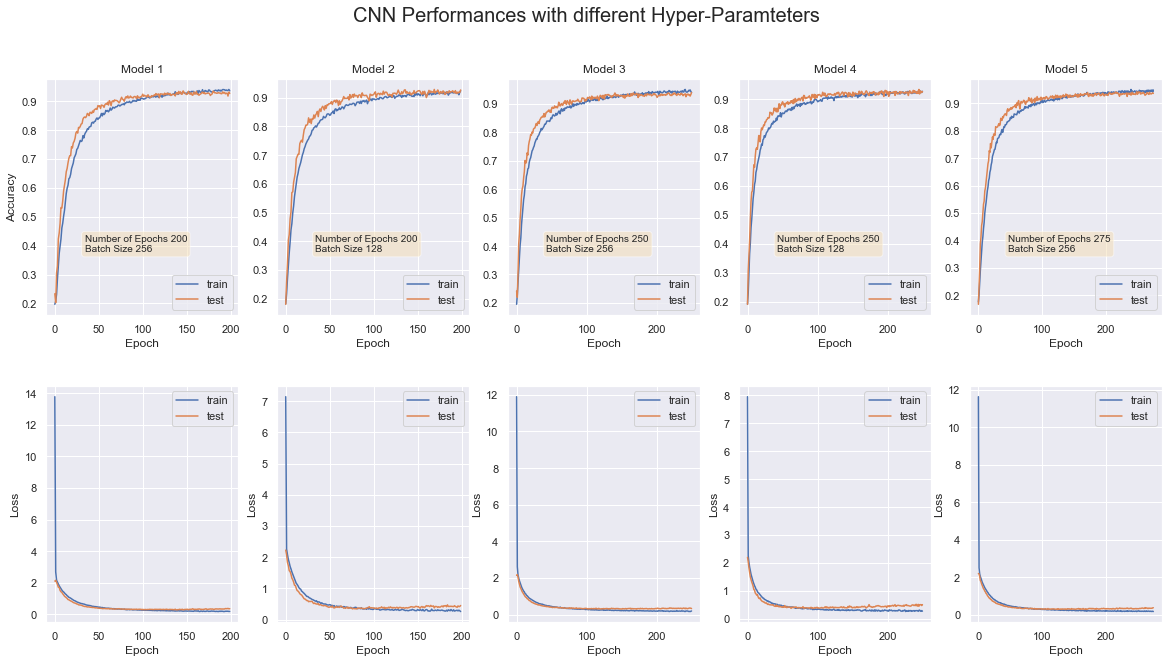

In [305]:
fig, axs = plt.subplots(2,5,figsize=(20,10),gridspec_kw={'hspace': 0.3, 'wspace': 0.2})

for i in range(nets):
    model_name = "Model_"+str(i+1)
    h = history[i]
    axs[0,i].plot(h.history['accuracy'])
    axs[0,i].plot(h.history['val_accuracy'])
    axs[0,0].set_ylabel("Accuracy")
    axs[0,i].set_xlabel("Epoch")
    axs[0,i].set_title("Model %s"%(i+1))
    axs[0,i].legend(['train', 'test'], loc='lower right')
    axs[1,i].plot(h.history['loss'])
    axs[1,i].plot(h.history['val_loss'])
    axs[1,i].set_ylabel("Loss")
    axs[1,i].set_xlabel("Epoch")
    axs[1,i].legend(['train', 'test'], loc='upper right')
    
    text = '\n'.join((
#                       Train Accuracy: %s"%train_acc,
#                       "Test Accuracy : %s"%test_acc,
                      "Number of Epochs %s"%epochs_s[i],
                      "Batch Size %s"%batch_s[i]))

    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

    axs[0,i].text(0.2, 0.3, text, transform=axs[0,i].transAxes, fontsize=10,
            verticalalignment='center', bbox=props)
    
fig.suptitle("CNN Performances with different Hyper-Paramteters",size=20)    
plt.show()

## 5.6 获取模型分类的结果

CNN 1: Epochs=200, Batch_size=256
分类结果
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       238
           1       0.96      0.94      0.95       121
           2       0.85      0.91      0.88       233
           3       0.91      0.82      0.87       246
           4       0.93      0.94      0.93       258
           5       0.97      1.00      0.98       255
           6       0.88      0.86      0.87        99
           7       0.97      0.97      0.97       266
           8       0.93      0.97      0.95       223
           9       0.92      0.84      0.88       244

    accuracy                           0.93      2183
   macro avg       0.92      0.92      0.92      2183
weighted avg       0.93      0.93      0.93      2183



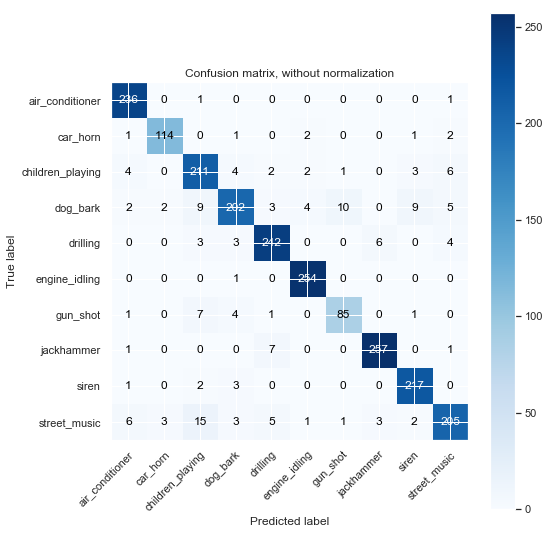

CNN 2: Epochs=200, Batch_size=128
分类结果
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       238
           1       0.96      0.92      0.94       121
           2       0.80      0.91      0.85       233
           3       0.94      0.82      0.87       246
           4       0.97      0.95      0.96       258
           5       0.96      0.99      0.97       255
           6       0.86      0.86      0.86        99
           7       0.96      0.96      0.96       266
           8       0.96      0.96      0.96       223
           9       0.88      0.86      0.87       244

    accuracy                           0.93      2183
   macro avg       0.93      0.92      0.92      2183
weighted avg       0.93      0.93      0.93      2183



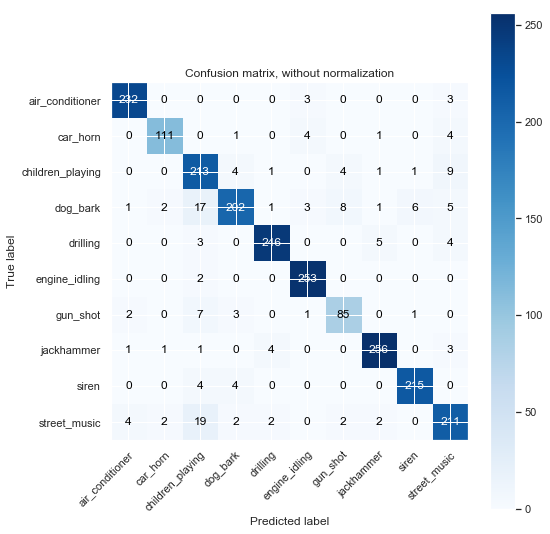

CNN 3: Epochs=250, Batch_size=256
分类结果
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       238
           1       0.96      0.93      0.95       121
           2       0.84      0.93      0.88       233
           3       0.92      0.87      0.90       246
           4       0.98      0.92      0.95       258
           5       0.98      0.99      0.99       255
           6       0.90      0.85      0.88        99
           7       0.95      0.98      0.97       266
           8       0.96      0.98      0.97       223
           9       0.90      0.89      0.90       244

    accuracy                           0.94      2183
   macro avg       0.94      0.93      0.94      2183
weighted avg       0.94      0.94      0.94      2183



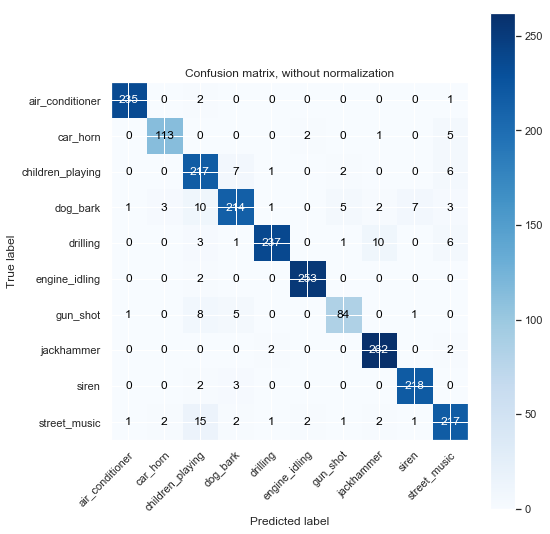

CNN 4: Epochs=250, Batch_size=128
分类结果
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       238
           1       0.98      0.92      0.95       121
           2       0.84      0.89      0.87       233
           3       0.91      0.80      0.85       246
           4       0.98      0.92      0.95       258
           5       0.97      0.99      0.98       255
           6       0.81      0.84      0.83        99
           7       0.96      0.98      0.97       266
           8       0.95      0.96      0.96       223
           9       0.89      0.90      0.89       244

    accuracy                           0.93      2183
   macro avg       0.92      0.92      0.92      2183
weighted avg       0.93      0.93      0.93      2183



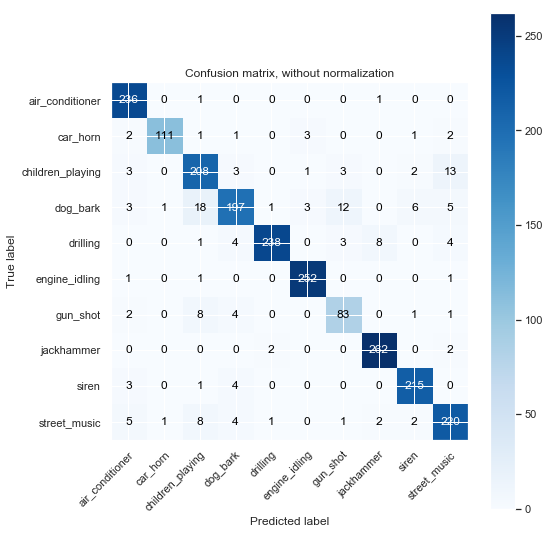

CNN 5: Epochs=275, Batch_size=256
分类结果
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       238
           1       0.97      0.93      0.95       121
           2       0.84      0.94      0.89       233
           3       0.92      0.85      0.88       246
           4       0.96      0.94      0.95       258
           5       0.98      0.99      0.98       255
           6       0.93      0.83      0.88        99
           7       0.97      0.96      0.97       266
           8       0.96      0.96      0.96       223
           9       0.88      0.92      0.90       244

    accuracy                           0.94      2183
   macro avg       0.94      0.93      0.93      2183
weighted avg       0.94      0.94      0.94      2183



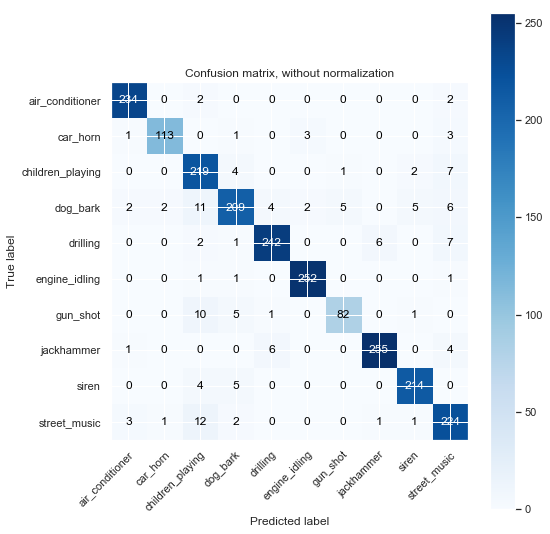

In [306]:
for j in range(nets):
    results = np.zeros((x_test.shape[0],10)) 
    results =  model[j].predict(x_test)
    results = np.argmax(results, axis = 1)
    val_y_n = np.argmax(y_test, axis =1)
    print("CNN {0:d}: Epochs={1:d}, Batch_size={2:d}".format(j+1,epochs_s[j],batch_s[j]))
    acc(val_y_n, results)


## 5.7 保存模型 加载模型测试

In [309]:
best_model = model[2]
model_json = best_model.to_json()
with open("mymodel.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
best_model.save_weights("mymodel.h5")

In [314]:
from tensorflow.keras.models import model_from_json
# load json and create model
json_file = open('mymodel.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("mymodel.h5")

In [316]:
loaded_model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
score = loaded_model.evaluate(x_test, y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

accuracy: 93.91%
